In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [3]:
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)[1:]# length 64
with open("./pkls/ignis_mitigator_info.pkl", "rb") as f:
    ignis_mitigator_info = pickle.load(f)
with open("./pkls/delta_mitigator_info.pkl", "rb") as f:
    delta_mitigator_info = pickle.load(f)
with open("./pkls/lnp_mitigator_info.pkl", "rb") as f:
    lnp_mitigator_info = pickle.load(f)
with open("./pkls/mooney01_mitigator_info.pkl", "rb") as f:
    mooney01_mitigator_info = pickle.load(f)
with open("./pkls/mooney001_mitigator_info.pkl", "rb") as f:
    mooney001_mitigator_info = pickle.load(f)
with open("./pkls/nation_bicgstab_mitigator_info.pkl", "rb") as f:
    nation_bicgstab_mitigator_info = pickle.load(f)
with open("./pkls/nation_lu_mitigator_info.pkl", "rb") as f:
    nation_lu_mitigator_info = pickle.load(f)
with open("./pkls/mthree_iterative_mitigator_info.pkl", "rb") as f:
    mthree_iterative_mitigator_info = pickle.load(f)

In [5]:
max_size = 65
max_length = 64
ignis_length = len(ignis_mitigator_info)
nation_bicgstab_length = len(nation_bicgstab_mitigator_info)
mooney01_length = len(mooney01_mitigator_info)
mooney001_length = len(mooney001_mitigator_info)

# Times

In [8]:
ignis_total_times = [ignis_mitigator_info[i]["times"]["total"] for i in range(ignis_length)]
delta_total_times = [delta_mitigator_info[i]["times"]["total"] for i in range(max_length)]
lnp_total_times = [lnp_mitigator_info[i]["times"]["total"] for i in range(max_length)]
mooney01_total_times = [mooney01_mitigator_info[i]["times"]["total"] for i in range(mooney01_length)]
mooney001_total_times = [mooney001_mitigator_info[i]["times"]["total"] for i in range(mooney001_length)]
nation_bicgstab_total_times = [nation_bicgstab_mitigator_info[i]["times"]["total"] for i in range(nation_bicgstab_length)]
nation_lu_total_times = [nation_lu_mitigator_info[i]["times"]["total"] for i in range(max_length)]

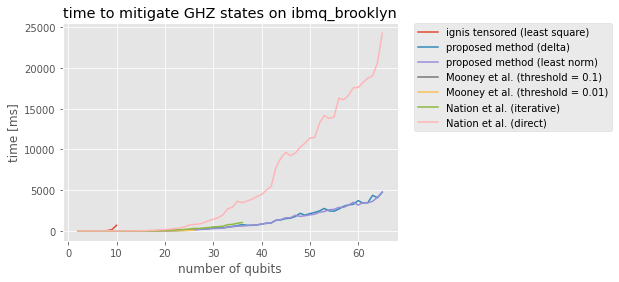

In [9]:
plt.style.use('ggplot')
plt.plot(range(2, ignis_length + 2), ignis_total_times, label="ignis tensored (least square)")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (iterative)")
plt.plot(range(2, max_length + 2), nation_lu_total_times, label="Nation et al. (direct)")
plt.xlabel("number of qubits")
plt.ylabel("time [ms]")
plt.title("time to mitigate GHZ states on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

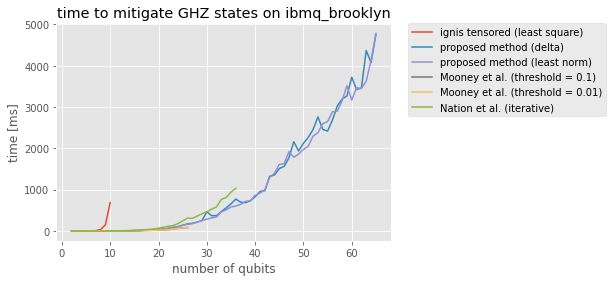

In [10]:
plt.style.use('ggplot')
plt.plot(range(2, ignis_length + 2), ignis_total_times, label="ignis tensored (least square)")
plt.plot(range(2, max_length + 2), delta_total_times, label="proposed method (delta)")
plt.plot(range(2, max_length + 2), lnp_total_times, label="proposed method (least norm)")
plt.plot(range(2, mooney01_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.1)")
plt.plot(range(2, mooney001_length + 2), mooney01_total_times, label="Mooney et al. (threshold = 0.01)")
plt.plot(range(2, nation_bicgstab_length + 2), nation_bicgstab_total_times, label="Nation et al. (iterative)")
plt.xlabel("number of qubits")
plt.ylabel("time [ms]")
plt.title("time to mitigate GHZ states on ibmq_brooklyn")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Sums

In [7]:
def sum_of_hist(hist):
    s = 0
    for key, val in hist.items():
        s += val
    return s

In [8]:
lnp_hist_sum_list = []
for hist in lnp_hist_list:
    lnp_hist_sum_list.append(sum_of_hist(hist))

In [9]:
delta_hist_sum_list = []
for hist in delta_hist_list:
    delta_hist_sum_list.append(sum_of_hist(hist))

In [28]:
nation_hist_sum_list = []
for hist, _ in nation_hist_list:
    nation_hist_sum_list.append(sum_of_hist(hist) * 8192)

In [13]:
mooney_hist_sum_list = []
for hist in mooney_hist_list:
    mooney_hist_sum_list.append(sum_of_hist(hist))

In [14]:
ignis_hist_sum_list = []
for hist in ignis_hist_list:
    ignis_hist_sum_list.append(sum_of_hist(hist))

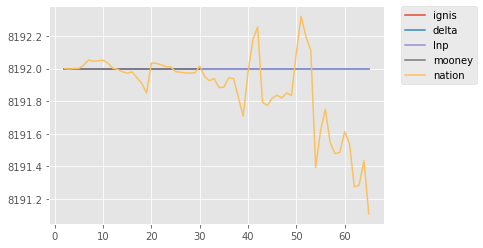

In [32]:
plt.clf()
plt.style.use('ggplot')
plt.plot(range(2,10 + 1), ignis_hist_sum_list, label="ignis")
plt.plot(range(2,max_size + 1), delta_hist_sum_list, label="delta")
plt.plot(range(2,max_size + 1), lnp_hist_sum_list, label="lnp")
plt.plot(range(2,30 + 1), mooney_hist_sum_list, label="mooney")
plt.plot(range(2,max_size + 1), nation_hist_sum_list, label="nation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)